In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as st
import yfinance as yf



In [2]:
start = '2020-01-01' #yyyy-mm-dd  
end = '2024-02-15'   #yyyy-mm-dd


df = yf.download('IRFC.NS', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2021-01-29  24.900000  25.799999  24.350000  24.799999  21.363665  381938573
2021-02-01  25.250000  25.400000  24.900000  25.100000  21.622097   72044464
2021-02-02  25.450001  25.450001  24.700001  24.750000  21.320595   36735442
2021-02-03  24.799999  24.900000  24.049999  24.250000  20.889874   45816269
2021-02-04  24.250000  25.799999  23.850000  25.350000  21.837456   88486029


In [3]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363665,381938573
1,2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622097,72044464
2,2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320595,36735442
3,2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889874,45816269
4,2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837456,88486029


In [4]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,24.900000,25.799999,24.350000,24.799999,381938573
1,25.250000,25.400000,24.900000,25.100000,72044464
2,25.450001,25.450001,24.700001,24.750000,36735442
3,24.799999,24.900000,24.049999,24.250000,45816269
4,24.250000,25.799999,23.850000,25.350000,88486029


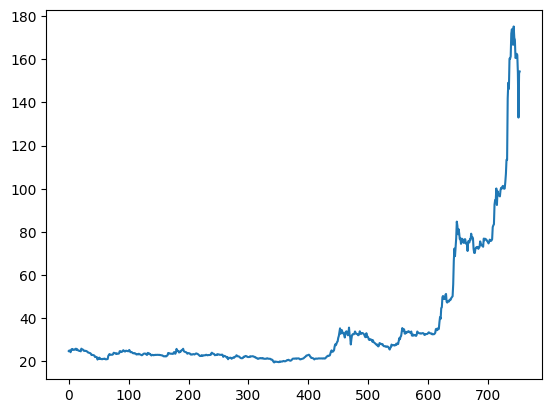

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,24.900000,25.799999,24.350000,24.799999,381938573
1,25.250000,25.400000,24.900000,25.100000,72044464
2,25.450001,25.450001,24.700001,24.750000,36735442
3,24.799999,24.900000,24.049999,24.250000,45816269
4,24.250000,25.799999,23.850000,25.350000,88486029
...,...,...,...,...,...
749,164.399994,164.399994,160.699997,161.949997,34218693
750,162.000000,162.000000,149.149994,153.699997,64801528
751,150.649994,151.050003,130.199997,132.949997,128716009
752,132.000000,156.300003,127.650002,153.449997,240631230


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100 

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
749    95.7635
750    96.5115
751    97.0285
752    97.7695
753    98.5465
Name: Close, Length: 754, dtype: float64

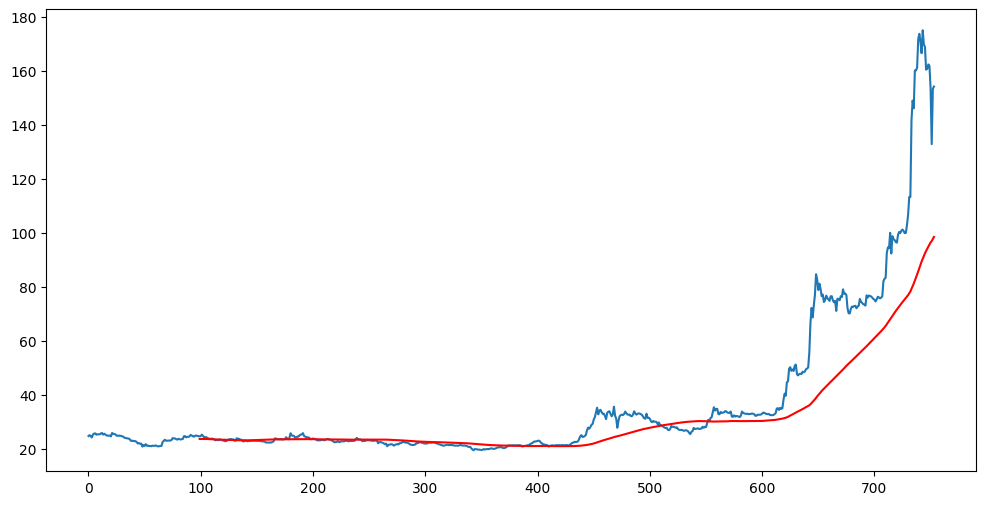

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
749    67.62175
750    68.25000
751    68.76700
752    69.38025
753    70.00050
Name: Close, Length: 754, dtype: float64

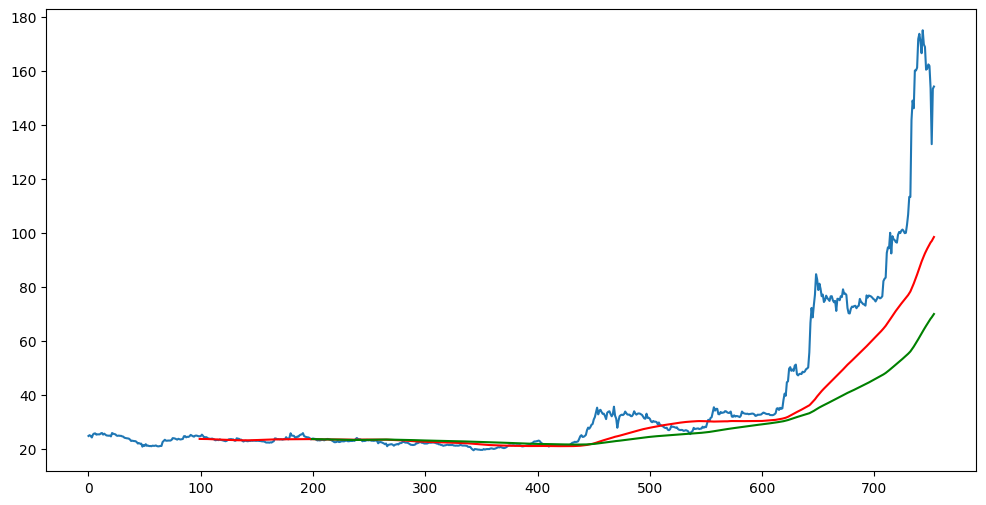

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(754, 5)

In [12]:
 # spliting data into Training and Testing
Data_training = pd.DataFrame(df['Close'][0:int(len(df)* 0.70)])
Data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(Data_training.shape)
print(Data_testing.shape)

(527, 1)
(227, 1)


In [13]:
Data_training.head()

,Close
0,24.799999
1,25.100000
2,24.750000
3,24.250000
4,25.350000


In [14]:
Data_testing.head()

,Close
527,27.000000
528,27.049999
529,27.000000
530,26.700001
531,26.799999


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
Data_training_array = scaler.fit_transform(Data_training)
Data_training_array

array([[0.3281733 ],
       [0.34674922],
       [0.32507737],
       [0.29411762],
       [0.36222909],
       [0.38390094],
       [0.38699687],
       [0.35913305],
       [0.36532502],
       [0.36532502],
       [0.36532502],
       [0.38699687],
       [0.39628477],
       [0.35913305],
       [0.38080489],
       [0.36222909],
       [0.34055724],
       [0.33746132],
       [0.33436527],
       [0.33746132],
       [0.3188854 ],
       [0.39628477],
       [0.38080489],
       [0.37151699],
       [0.36532502],
       [0.33746132],
       [0.33126934],
       [0.33746132],
       [0.33126934],
       [0.33126934],
       [0.3188854 ],
       [0.31269342],
       [0.28792565],
       [0.28173367],
       [0.27554182],
       [0.27244577],
       [0.2662538 ],
       [0.24458207],
       [0.21362232],
       [0.21981417],
       [0.21362232],
       [0.21052627],
       [0.20743034],
       [0.1857585 ],
       [0.15479875],
       [0.16408665],
       [0.15170282],
       [0.151

In [17]:
Data_training_array.shape

(527, 1)

In [18]:
X_train = []
y_train = []

for i in range (100,Data_training_array.shape[0]):
    X_train.append(Data_training_array[i-100:i])
    y_train.append(Data_training_array[i,0])
    
    
X_train,y_train = np.array(X_train), np.array(y_train)   

In [19]:
X_train.shape

(427, 100, 1)

In [20]:
#ml model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu',return_sequences = True,
          input_shape= (X_train.shape[1],1)))
model.add(Dropout(0.2))


model = Sequential()
model.add(LSTM(units = 60, activation ='relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation ='relu',return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

model.build(input_shape=(None, X_train.shape[1], 1))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 60)           14880     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               96480     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train ,epochs=50)

Epoch 1/50
14/14 [==============================] - 13s 353ms/step - loss: 0.0800
Epoch 2/50
14/14 [==============================] - 4s 318ms/step - loss: 0.0304
Epoch 3/50
14/14 [==============================] - 4s 315ms/step - loss: 0.0180
Epoch 4/50
14/14 [==============================] - 5s 327ms/step - loss: 0.0166
Epoch 5/50
14/14 [==============================] - 5s 320ms/step - loss: 0.0138
Epoch 6/50
14/14 [==============================] - 5s 325ms/step - loss: 0.0114
Epoch 7/50
14/14 [==============================] - 4s 321ms/step - loss: 0.0116
Epoch 8/50
14/14 [==============================] - 4s 296ms/step - loss: 0.0159
Epoch 9/50
14/14 [==============================] - 4s 298ms/step - loss: 0.0120
Epoch 10/50
14/14 [==============================] - 4s 304ms/step - loss: 0.0115
Epoch 11/50
14/14 [==============================] - 4s 313ms/step - loss: 0.0089
Epoch 12/50
14/14 [==============================] - 4s 282ms/step - loss: 0.0093
Epoch 13/50
14/14 [=====

In [25]:
model.save('IRFC_keras_model.h5')

In [26]:
Data_testing.head()

,Close
527,27.000000
528,27.049999
529,27.000000
530,26.700001
531,26.799999


In [27]:
past_100_days = Data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days,Data_testing],ignore_index= True)

In [29]:
final_df.head()

,Close
0,21.299999
1,21.350000
2,21.600000
3,21.950001
4,22.299999


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [3.24999325e-04],
       [1.94995876e-03],
       [4.22490444e-03],
       [6.49983773e-03],
       [6.82483705e-03],
       [8.77478341e-03],
       [8.12479716e-03],
       [8.77478341e-03],
       [9.74975659e-03],
       [1.55996205e-02],
       [2.20994582e-02],
       [2.46993908e-02],
       [2.04744988e-02],
       [2.07994857e-02],
       [2.27494321e-02],
       [2.53493771e-02],
       [3.67240931e-02],
       [4.28989315e-02],
       [4.02989989e-02],
       [4.41989040e-02],
       [4.97237686e-02],
       [5.16737149e-02],
       [6.23984447e-02],
       [6.82482962e-02],
       [7.96230122e-02],
       [9.09977282e-02],
       [7.47481339e-02],
       [8.38479166e-02],
       [8.57978630e-02],
       [8.02730108e-02],
       [7.60481064e-02],
       [7.63730933e-02],
       [7.08482412e-02],
       [6.33734179e-02],
       [7.86480514e-02],
       [8.12479716e-02],
       [8.22229572e-02],
       [7.53981325e-02],
       [7.01982425e-02],


In [31]:
input_data.shape

(327, 1)

In [32]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(227, 100, 1)
(227,)


In [34]:
# making predication

y_predicated = model.predict(x_test)

8/8 [==============================] - 2s 93ms/step


In [35]:
y_predicated.shape

(227, 1)

In [36]:
y_test

array([0.03704908, 0.03737407, 0.03704908, 0.03509913, 0.03574911,
       0.03672409, 0.03574911, 0.03412415, 0.02989926, 0.02729932,
       0.03282419, 0.03444915, 0.04224895, 0.03964901, 0.03997401,
       0.04062399, 0.04094899, 0.03932403, 0.040299  , 0.04062399,
       0.04517388, 0.04257394, 0.04484889, 0.0438739 , 0.05362366,
       0.06174846, 0.05817355, 0.06597336, 0.06792331, 0.07962301,
       0.09197271, 0.08384792, 0.0880728 , 0.0880728 , 0.07539813,
       0.07507312, 0.080598  , 0.07832304, 0.07897304, 0.07962301,
       0.08254794, 0.08189797, 0.07929803, 0.07832304, 0.07832304,
       0.08157296, 0.06954827, 0.06889828, 0.0724732 , 0.06954827,
       0.07084824, 0.07052325, 0.06954827, 0.0682483 , 0.07149822,
       0.08157296, 0.07864805, 0.07702309, 0.07637309, 0.07604811,
       0.07637309, 0.07507312, 0.07572312, 0.07604811, 0.07669808,
       0.07637309, 0.07474813, 0.07117323, 0.0718232 , 0.07409816,
       0.07377317, 0.07409816, 0.07442315, 0.07669808, 0.07897

In [37]:
y_predicated

array([[0.04934831],
       [0.04923341],
       [0.04908204],
       [0.04890067],
       [0.04868767],
       [0.04845441],
       [0.04821899],
       [0.04798833],
       [0.04775908],
       [0.04750715],
       [0.04721337],
       [0.04691409],
       [0.0466398 ],
       [0.04645545],
       [0.04636576],
       [0.04636799],
       [0.04645284],
       [0.04660611],
       [0.04679642],
       [0.0470079 ],
       [0.04722899],
       [0.04748718],
       [0.04776409],
       [0.04806313],
       [0.04836923],
       [0.04875224],
       [0.04930209],
       [0.05000013],
       [0.05088868],
       [0.05200619],
       [0.05345879],
       [0.05542785],
       [0.05777861],
       [0.06049422],
       [0.06350929],
       [0.06645264],
       [0.06903309],
       [0.07120033],
       [0.0728651 ],
       [0.0740267 ],
       [0.07475759],
       [0.07519431],
       [0.07542259],
       [0.07544925],
       [0.07527814],
       [0.07494167],
       [0.07455535],
       [0.073

In [38]:
scaler.scale_

array([0.00649984])

In [39]:
scale_factor = 1/0.01566171
y_predicated = y_predicated * scale_factor
y_test = y_test * scale_factor

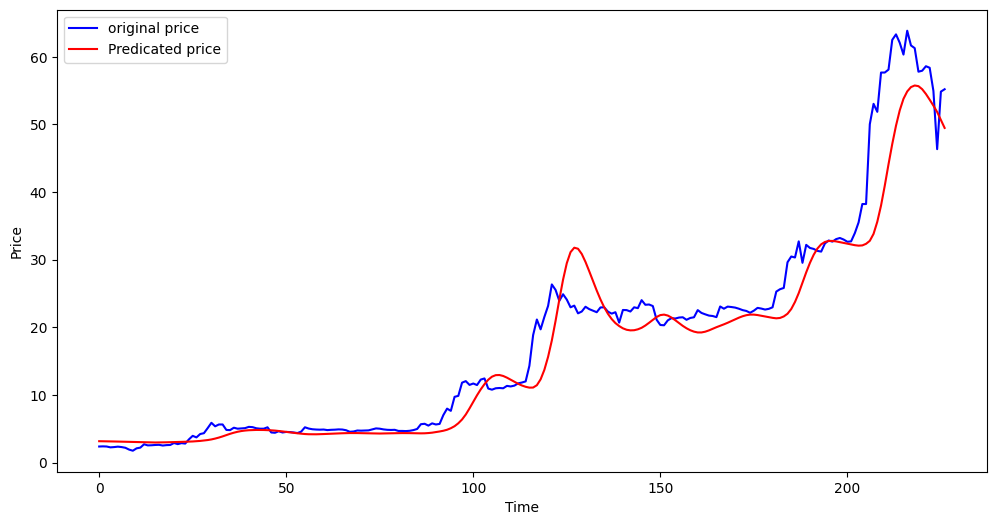

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='original price')
plt.plot(y_predicated,'r',label ='Predicated price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
import yfinance as yf

# Function to calculate intrinsic value based on user-provided P/E ratio and EPS
def calculate_intrinsic_value(ticker, pe, eps):
    # Fetch current market price
    stock = yf.Ticker(ticker)
    current_price = stock.history(period="1d")["Close"].iloc[-1]

    # Calculate intrinsic value
    intrinsic_value = pe * eps

    # Compare intrinsic value with current price
    if intrinsic_value > current_price:
        status = 'undervalued'
    elif intrinsic_value < current_price:
        status = 'overvalued'
    else:
        status = 'fairly valued'

    return intrinsic_value, current_price, status

# Input function to get PE and EPS from the user
def get_input():
    ticker = input("Enter the stock ticker symbol: ")
    pe = float(input("Enter the P/E ratio: "))
    eps = float(input("Enter the earnings per share (EPS): "))
    return ticker, pe, eps

# Example usage
ticker, pe, eps = get_input()
intrinsic_value, current_price, status = calculate_intrinsic_value(ticker, pe, eps)
print(f'Intrinsic Value: {intrinsic_value:.2f}')
print(f'Current Price: {current_price:.2f}')
print(f'Stock is {status}')


Enter the stock ticker symbol: POWERGRID.NS
Enter the P/E ratio: 15.73
Enter the earnings per share (EPS): 17.35
Intrinsic Value: 272.92
Current Price: 273.00
Stock is overvalued


In [91]:
import yfinance as yf

# Function to calculate intrinsic value based on historical data and user-provided P/E ratio and EPS
def calculate_intrinsic_value(ticker, start_date, end_date, pe, eps):
    # Fetch historical stock data for the specified period
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        return None, None, None, "Failed to fetch historical data"

    # Fetch current market price
    current_price = stock_data['Close'].iloc[-1]

    # Calculate intrinsic value
    intrinsic_value = pe * eps

    # Compare intrinsic value with current price
    if intrinsic_value > current_price:
        status = 'undervalued'
    elif intrinsic_value < current_price:
        status = 'overvalued'
    else:
        status = 'fairly valued'

    return intrinsic_value, current_price, status, None

# Input function to get PE and EPS from the user, along with start and end dates
def get_input():
    ticker = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    pe = float(input("Enter the P/E ratio: "))
    eps = float(input("Enter the earnings per share (EPS): "))
    return ticker, start_date, end_date, pe, eps

# Example usage
ticker, start_date, end_date, pe, eps = get_input()
intrinsic_value, current_price, status, error = calculate_intrinsic_value(ticker, start_date, end_date, pe, eps)
if error:
    print(error)
else:
    print(f'Intrinsic Value: {intrinsic_value:.2f}')
    print(f'Current Price: {current_price:.2f}')
    print(f'Stock is {status}')


Enter the stock ticker symbol: POWERGRID.NS
Enter the start date (YYYY-MM-DD): 2021-01-01
Enter the end date (YYYY-MM-DD): 2024-02-09
Enter the P/E ratio: 15.73
Enter the earnings per share (EPS): 17.35
[*********************100%%**********************]  1 of 1 completed
Intrinsic Value: 272.92
Current Price: 276.20
Stock is overvalued


In [99]:
import yfinance as yf

# Function to calculate intrinsic value based on user-provided P/E ratio and EPS
def calculate_intrinsic_value(ticker, start_year, end_year, pe, eps):
    # Fetch historical stock data for the specified period
    start_date = f"{start_year}-01-01"
    end_date = f"{end_year}-12-31"
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if stock_data.empty:
        return None, None, None, "Failed to fetch historical data"

    # Calculate intrinsic value using the user-provided P/E ratio and EPS
    intrinsic_value = pe * eps

    # Fetch current market price
    current_price = stock_data['Close'].iloc[-1]

    # Compare intrinsic value with current price
    if intrinsic_value > current_price:
        status = 'undervalued'
    elif intrinsic_value < current_price:
        status = 'overvalued'
    else:
        status = 'fairly valued'

    return intrinsic_value, current_price, status, None

# Input function to get user-provided data
def get_input():
    ticker = input("Enter the stock ticker symbol: ")
    start_year = int(input("Enter the start year: "))
    end_year = int(input("Enter the end year: "))
    pe = float(input("Enter the P/E ratio: "))
    eps = float(input("Enter the earnings per share (EPS): "))
    return ticker, start_year, end_year, pe, eps

# Example usage
ticker, start_year, end_year, pe, eps = get_input()
intrinsic_value, current_price, status, error = calculate_intrinsic_value(ticker, start_year, end_year, pe, eps)
if error:
    print(error)
else:
    print(f'Intrinsic Value: {intrinsic_value:.2f}')
    print(f'Current Price: {current_price:.2f}')
    print(f'Stock is {status}')


Enter the stock ticker symbol: POWERGRID.NS
Enter the start year: 2021
Enter the end year: 2024
Enter the P/E ratio: 15.73
Enter the earnings per share (EPS): 17.35
[*********************100%%**********************]  1 of 1 completed
Intrinsic Value: 272.92
Current Price: 273.00
Stock is overvalued


In [96]:
w = 20.1
t = 5
print(w/t)

4.0200000000000005
